# Trip Level Analysis
Purpose: analyze, clean, and preprocess 'Trip_Level_Ridership(in).csv'

In [308]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# read in data
INPUT_FOLDER = '../Capstone/'
FILE = 'Trip_Level.csv'

trip_df = pd.read_csv(INPUT_FOLDER + FILE)
trip_df

,SERVICE_CHANGE_NUM,OPERATION_DATE,SERVICE_RTE_NUM,TRIP_ID,EXPRESS_LOCAL_CD,INBD_OUTBD_CD,SCHED_DAY_TYPE_CODED_NUM,DAY_CODE,SCHED_START_TIME,ACTUAL_START_TIME,SCHED_END_TIME,ACTUAL_END_TIME,TIME_PERIOD,PSNGR_BOARDINGS,PSNGR_ALIGHTINGS,MAX_PSNGR_LOAD,CROWDING_THRESHOLD_NBR
0,243,2025-01-01,1,73352704,L,I,6,HOL,6:42:00 AM,06:42:45 AM,6:54:00 AM,06:55:09 AM,AM Peak,8.28,0.92,8.0,52
1,243,2025-01-01,1,73352706,L,I,6,HOL,8:42:00 AM,08:42:35 AM,8:54:00 AM,08:53:17 AM,AM Peak,9.20,0.92,9.0,52
2,243,2025-01-01,1,73352653,L,I,6,HOL,7:12:00 AM,07:13:31 AM,7:24:00 AM,07:29:21 AM,AM Peak,1.84,1.84,1.0,52
3,243,2025-01-01,1,73352650,L,I,6,HOL,7:42:00 AM,07:43:51 AM,7:54:00 AM,07:55:29 AM,AM Peak,0.92,0.00,1.0,52
4,243,2025-01-01,1,73352611,L,I,6,HOL,9:40:00 AM,09:42:43 AM,9:53:00 AM,09:54:46 AM,Early Midday,10.12,0.00,11.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925270,253,2025-12-31,678,69405625,L,O,0,WK,4:40:00 PM,04:38:55 PM,5:34:00 PM,05:31:39 PM,PM Peak,15.36,15.36,10.0,76
2925271,253,2025-12-31,678,69405659,L,O,0,WK,5:51:00 PM,05:53:48 PM,6:42:00 PM,06:52:13 PM,PM Peak,28.80,28.80,20.0,76
2925272,253,2025-12-31,678,69405658,L,O,0,WK,3:20:00 PM,03:22:02 PM,4:14:00 PM,04:17:29 PM,PM Peak,46.08,46.08,26.0,76
2925273,253,2025-12-31,678,69405614,L,O,0,WK,3:50:00 PM,03:49:13 PM,4:46:00 PM,04:40:53 PM,PM Peak,49.92,49.92,40.0,76


## Explore

In [310]:
print("\nColumn Names and Types:")
trip_df.info()


Column Names and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925275 entries, 0 to 2925274
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SERVICE_CHANGE_NUM        int64  
 1   OPERATION_DATE            object 
 2   SERVICE_RTE_NUM           int64  
 3   TRIP_ID                   int64  
 4   EXPRESS_LOCAL_CD          object 
 5   INBD_OUTBD_CD             object 
 6   SCHED_DAY_TYPE_CODED_NUM  int64  
 7   DAY_CODE                  object 
 8   SCHED_START_TIME          object 
 9   ACTUAL_START_TIME         object 
 10  SCHED_END_TIME            object 
 11  ACTUAL_END_TIME           object 
 12  TIME_PERIOD               object 
 13  PSNGR_BOARDINGS           float64
 14  PSNGR_ALIGHTINGS          float64
 15  MAX_PSNGR_LOAD            float64
 16  CROWDING_THRESHOLD_NBR    int64  
dtypes: float64(3), int64(5), object(9)
memory usage: 379.4+ MB


In [311]:
print("\nBasic Statistics:")
trip_df.describe().T


Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
SERVICE_CHANGE_NUM,2925275.0,2.497831e+02,3.884324e+00,243.0,251.00,251.00,253.00,253.00
SERVICE_RTE_NUM,2925275.0,2.309753e+02,2.369424e+02,1.0,44.00,128.00,348.00,989.00
TRIP_ID,2925275.0,6.760281e+07,6.705480e+06,34746433.0,63545822.00,69055120.00,72442028.00,81035976.00
SCHED_DAY_TYPE_CODED_NUM,2925275.0,4.336888e-01,1.013401e+00,0.0,0.00,0.00,0.00,6.00
PSNGR_BOARDINGS,2925259.0,2.524468e+01,1.950372e+01,0.0,11.04,20.37,34.34,200.99
PSNGR_ALIGHTINGS,2925259.0,2.526502e+01,1.959880e+01,0.0,11.00,20.37,34.34,200.99
MAX_PSNGR_LOAD,2896742.0,1.491126e+01,1.122812e+01,1.0,7.00,12.00,20.00,119.00
CROWDING_THRESHOLD_NBR,2925275.0,6.414221e+01,1.525010e+01,37.0,48.00,74.00,78.00,81.00


### Numerical variables summary

In [312]:
numerical_cols = trip_df.select_dtypes(include=[np.number]).columns.tolist()
corr = trip_df[numerical_cols].corr()
corr

,SERVICE_CHANGE_NUM,SERVICE_RTE_NUM,TRIP_ID,SCHED_DAY_TYPE_CODED_NUM,PSNGR_BOARDINGS,PSNGR_ALIGHTINGS,MAX_PSNGR_LOAD,CROWDING_THRESHOLD_NBR
SERVICE_CHANGE_NUM,1.000000,-0.012041,0.231011,-0.033722,0.015614,0.013725,-0.015301,-0.003468
SERVICE_RTE_NUM,-0.012041,1.000000,0.009104,0.006519,0.118228,0.118000,0.169492,0.243065
TRIP_ID,0.231011,0.009104,1.000000,-0.032977,0.013715,0.015194,-0.041983,-0.075724
SCHED_DAY_TYPE_CODED_NUM,-0.033722,0.006519,-0.032977,1.000000,-0.103641,-0.103009,-0.106356,0.018689
PSNGR_BOARDINGS,0.015614,0.118228,0.013715,-0.103641,1.000000,0.994529,0.884158,0.314815
PSNGR_ALIGHTINGS,0.013725,0.118000,0.015194,-0.103009,0.994529,1.000000,0.882164,0.313755
MAX_PSNGR_LOAD,-0.015301,0.169492,-0.041983,-0.106356,0.884158,0.882164,1.000000,0.307953
CROWDING_THRESHOLD_NBR,-0.003468,0.243065,-0.075724,0.018689,0.314815,0.313755,0.307953,1.000000


In [313]:
# filter high correlations
high_corr_matrix = corr[(corr > 0.8) | (corr < -0.8)]

In [314]:
# extract pairs
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

if high_corr_pairs:
    print("\nStrongly correlated pairs:")
    for pair in high_corr_pairs:
        print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.4f}")


Strongly correlated pairs:
  PSNGR_BOARDINGS <-> PSNGR_ALIGHTINGS: 0.9945
  PSNGR_BOARDINGS <-> MAX_PSNGR_LOAD: 0.8842
  PSNGR_ALIGHTINGS <-> MAX_PSNGR_LOAD: 0.8822


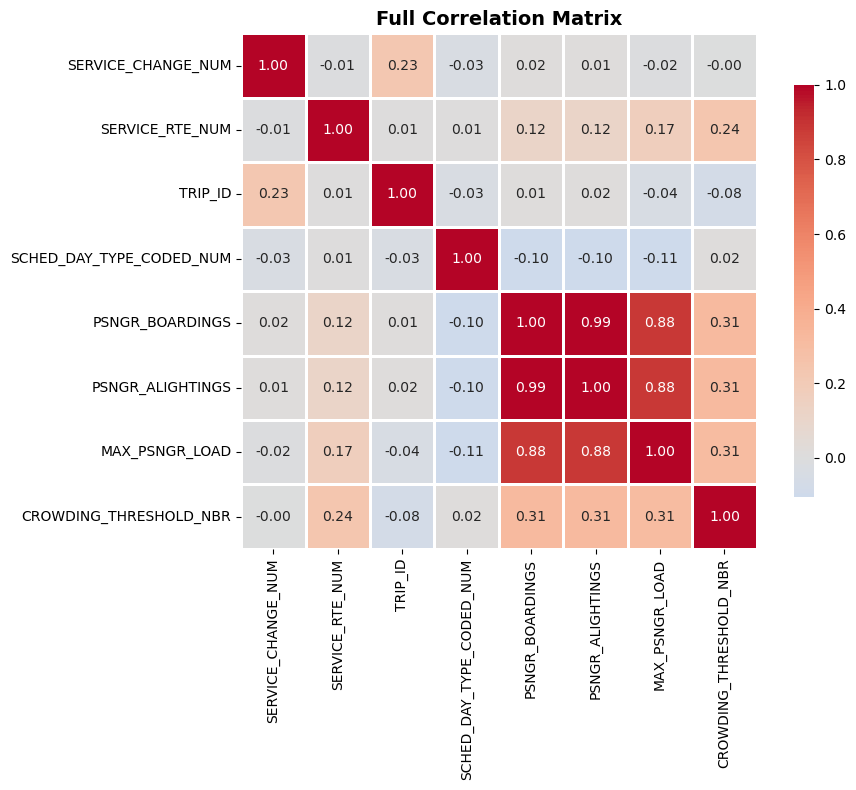

In [315]:
# full correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Full Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Categorical variables summary

In [316]:
trip_df.describe(exclude='number')

,OPERATION_DATE,EXPRESS_LOCAL_CD,INBD_OUTBD_CD,DAY_CODE,SCHED_START_TIME,ACTUAL_START_TIME,SCHED_END_TIME,ACTUAL_END_TIME,TIME_PERIOD
count,2925275,2925275,2925275,2919274,2925275,2925275,2925275,2925275,2925275
unique,365,2,2,4,1433,86607,1421,87426,6
top,2025-10-16,L,I,WK,1:00:00 PM,07:20:17 AM,6:39:00 PM,09:35:05 AM,PM Peak
freq,9133,2668051,1479031,2209996,10077,130,5990,86,707503


In [317]:
print(f"Unique Routes: {trip_df['SERVICE_RTE_NUM'].unique()}")

Unique Routes: [  1   2   3   4   5   7   8  10  11  12  13  14  21  24  27  28  31  32
  33  36  40  43  44  45  48  49  50  60  61  62  65  67  70  75 101 105
 106 107 118 124 125 128 131 132 148 150 156 160 161 165 168 181 184 221
 225 226 230 231 239 240 241 245 249 250 255 271 331 333 345 346 348 365
 372 522 542 545 550 554 671 672 673 674 675 676 677 678   9  17  22  56
  57  79 102 111 113 119 153 162 177 182 183 187 193 208 212 218 246 257
 269 303 311 322 556 566 982 986 989 893 895 981 988 987 858 203 222 223
 256]


In [318]:
print(f"Express/Local Distribution:")
trip_df.EXPRESS_LOCAL_CD.value_counts()

Express/Local Distribution:


EXPRESS_LOCAL_CD
L    2668051
E     257224
Name: count, dtype: int64

In [319]:
print(f"Inbound/Outbound Distribution:")
trip_df.INBD_OUTBD_CD.value_counts()

Inbound/Outbound Distribution:


INBD_OUTBD_CD
I    1479031
O    1446244
Name: count, dtype: int64

In [320]:
print(f"Day Type Distribution:")
trip_df.DAY_CODE.value_counts()

Day Type Distribution:


DAY_CODE
WK     2209996
SA      312393
SU      305947
HOL      90938
Name: count, dtype: int64

In [321]:
print(f"Time Period Distribution:")
trip_df.TIME_PERIOD.value_counts()

Time Period Distribution:


TIME_PERIOD
PM Peak         707503
AM Peak         618394
Midday          486065
Early Midday    485205
Evening         362456
Night           265652
Name: count, dtype: int64

### Data Type Conversion

In [322]:
trip_clean = trip_df.copy()

# convert date column to datetime
trip_clean['OPERATION_DATE'] = pd.to_datetime(trip_clean['OPERATION_DATE'])

# Convert categorical columns to category type
categorical_cols = ['EXPRESS_LOCAL_CD', 'INBD_OUTBD_CD', 'DAY_CODE', 'TIME_PERIOD']
for col in categorical_cols:
    if col in trip_clean.columns:
        trip_clean[col] = trip_clean[col].astype('category')
        print(f"Converted {col} to category type")

print("\nData types after conversion:")
print(trip_clean.dtypes)

Converted EXPRESS_LOCAL_CD to category type
Converted INBD_OUTBD_CD to category type
Converted DAY_CODE to category type
Converted TIME_PERIOD to category type

Data types after conversion:
SERVICE_CHANGE_NUM                   int64
OPERATION_DATE              datetime64[ns]
SERVICE_RTE_NUM                      int64
TRIP_ID                              int64
EXPRESS_LOCAL_CD                  category
INBD_OUTBD_CD                     category
SCHED_DAY_TYPE_CODED_NUM             int64
DAY_CODE                          category
SCHED_START_TIME                    object
ACTUAL_START_TIME                   object
SCHED_END_TIME                      object
ACTUAL_END_TIME                     object
TIME_PERIOD                       category
PSNGR_BOARDINGS                    float64
PSNGR_ALIGHTINGS                   float64
MAX_PSNGR_LOAD                     float64
CROWDING_THRESHOLD_NBR               int64
dtype: object


### Missing Data

In [323]:
trip_df.isna().sum()

SERVICE_CHANGE_NUM              0
OPERATION_DATE                  0
SERVICE_RTE_NUM                 0
TRIP_ID                         0
EXPRESS_LOCAL_CD                0
INBD_OUTBD_CD                   0
SCHED_DAY_TYPE_CODED_NUM        0
DAY_CODE                     6001
SCHED_START_TIME                0
ACTUAL_START_TIME               0
SCHED_END_TIME                  0
ACTUAL_END_TIME                 0
TIME_PERIOD                     0
PSNGR_BOARDINGS                16
PSNGR_ALIGHTINGS               16
MAX_PSNGR_LOAD              28533
CROWDING_THRESHOLD_NBR          0
dtype: int64

In [324]:
# investigate NaN values in DAY_CODE
trip_df[trip_df['DAY_CODE'].isna()]

,SERVICE_CHANGE_NUM,OPERATION_DATE,SERVICE_RTE_NUM,TRIP_ID,EXPRESS_LOCAL_CD,INBD_OUTBD_CD,SCHED_DAY_TYPE_CODED_NUM,DAY_CODE,SCHED_START_TIME,ACTUAL_START_TIME,SCHED_END_TIME,ACTUAL_END_TIME,TIME_PERIOD,PSNGR_BOARDINGS,PSNGR_ALIGHTINGS,MAX_PSNGR_LOAD,CROWDING_THRESHOLD_NBR
2037138,253,2025-09-13,1,72742574,L,I,2,NaN,6:41:00 AM,06:42:16 AM,6:54:00 AM,06:56:11 AM,AM Peak,0.00,0.00,NaN,51
2037139,253,2025-09-13,1,72742571,L,I,2,NaN,7:39:00 AM,07:40:21 AM,7:54:00 AM,07:55:49 AM,AM Peak,0.00,0.00,NaN,51
2037140,253,2025-09-13,1,72742533,L,I,2,NaN,11:37:00 AM,11:38:21 AM,11:53:00 AM,11:55:35 AM,Early Midday,7.76,7.76,3.0,51
2037141,253,2025-09-13,1,72742565,L,I,2,NaN,9:09:00 AM,09:10:38 AM,9:24:00 AM,09:26:12 AM,Early Midday,9.70,9.70,7.0,51
2037142,253,2025-09-13,1,72742539,L,I,2,NaN,10:07:00 AM,10:08:15 AM,10:23:00 AM,10:26:33 AM,Early Midday,13.58,13.58,8.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043134,253,2025-09-13,678,63632781,L,O,2,NaN,3:45:00 PM,03:50:13 PM,4:36:00 PM,04:42:24 PM,PM Peak,85.44,85.44,49.0,76
2043135,253,2025-09-13,678,63632789,L,O,2,NaN,5:45:00 PM,05:46:45 PM,6:36:00 PM,06:33:08 PM,PM Peak,67.20,67.20,34.0,76
2043136,253,2025-09-13,678,63632779,L,O,2,NaN,3:15:00 PM,03:15:33 PM,4:06:00 PM,03:58:07 PM,PM Peak,49.92,49.92,26.0,76
2043137,253,2025-09-13,678,63632793,L,O,2,NaN,6:45:00 PM,06:43:56 PM,7:36:00 PM,07:34:23 PM,PM Peak,31.68,31.68,15.0,76


In [325]:
# observation: DAY_CODE is NaN where OPERATION_DATE is 2025-09-23, which is Saturday, matches with SCHED_DAY_TYPE_CODED_NUM of 2
print(f"Unique dates with missing DAY_CODE: {trip_df[trip_df['DAY_CODE'].isna()]['OPERATION_DATE'].unique()}")

# fill missing DAY_CODE with 'SA'
trip_clean.loc[trip_clean['DAY_CODE'].isna(), 'DAY_CODE'] = 'SA'

Unique dates with missing DAY_CODE: ['2025-09-13']


In [326]:
# investigate NaN values in MAX_PSNGR_LOAD
trip_df[trip_df['MAX_PSNGR_LOAD'].isna()]

,SERVICE_CHANGE_NUM,OPERATION_DATE,SERVICE_RTE_NUM,TRIP_ID,EXPRESS_LOCAL_CD,INBD_OUTBD_CD,SCHED_DAY_TYPE_CODED_NUM,DAY_CODE,SCHED_START_TIME,ACTUAL_START_TIME,SCHED_END_TIME,ACTUAL_END_TIME,TIME_PERIOD,PSNGR_BOARDINGS,PSNGR_ALIGHTINGS,MAX_PSNGR_LOAD,CROWDING_THRESHOLD_NBR
23,243,2025-01-01,1,73352571,L,I,6,HOL,10:42:00 PM,10:48:12 PM,10:54:00 PM,10:58:18 PM,Night,0.0,0.0,NaN,52
25,243,2025-01-01,1,73352694,L,I,6,HOL,12:12:00 AM,12:12:13 X,12:24:00 AM,12:24:07 X,Night,0.0,0.0,NaN,52
26,243,2025-01-01,1,73352698,L,I,6,HOL,10:12:00 PM,10:12:33 PM,10:24:00 PM,10:25:21 PM,Night,0.0,0.0,NaN,52
37,243,2025-01-01,1,73352701,L,O,6,HOL,5:33:00 AM,05:38:51 AM,5:57:00 AM,06:01:23 AM,AM Peak,0.0,0.0,NaN,52
93,243,2025-01-01,3,73353792,L,I,6,HOL,10:51:00 AM,10:52:59 AM,11:08:00 AM,11:11:58 AM,Early Midday,0.0,0.0,NaN,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923497,253,2025-12-31,542,72103124,E,I,0,WK,6:38:00 AM,06:38:18 AM,7:05:00 AM,07:03:56 AM,AM Peak,0.0,0.0,NaN,81
2923523,253,2025-12-31,542,72103097,E,I,0,WK,3:44:00 PM,03:48:37 PM,4:19:00 PM,04:15:36 PM,PM Peak,0.0,0.0,NaN,81
2923532,253,2025-12-31,542,56956557,E,O,0,WK,11:08:00 AM,11:07:56 AM,11:43:00 AM,11:33:36 AM,Early Midday,0.0,0.0,NaN,81
2923537,253,2025-12-31,542,56957801,E,O,0,WK,9:15:00 PM,09:18:12 PM,9:43:00 PM,09:43:52 PM,Evening,0.0,0.0,NaN,81


In [327]:
# observation: MAX_PSNGR_LOAD is NaN where all values for boarding and alighting are 0, indicating valid deadheading trips
print("All boarding values for NaN max passenger load values:", trip_df[trip_df['MAX_PSNGR_LOAD'].isna()]['PSNGR_BOARDINGS'].unique())
print("All alighting values for NaN max passenger load values:", trip_df[trip_df['MAX_PSNGR_LOAD'].isna()]['PSNGR_ALIGHTINGS'].unique())

# therefore, we can safely fill NaN MAX_PSNGR_LOAD values with 0
trip_clean['MAX_PSNGR_LOAD'] = trip_df['MAX_PSNGR_LOAD'].fillna(0)

All boarding values for NaN max passenger load values: [0.]
All alighting values for NaN max passenger load values: [0.]


In [328]:
# investigate NaN values in PSNGR_BOARDINGS
trip_df[trip_df['PSNGR_BOARDINGS'].isna()]

,SERVICE_CHANGE_NUM,OPERATION_DATE,SERVICE_RTE_NUM,TRIP_ID,EXPRESS_LOCAL_CD,INBD_OUTBD_CD,SCHED_DAY_TYPE_CODED_NUM,DAY_CODE,SCHED_START_TIME,ACTUAL_START_TIME,SCHED_END_TIME,ACTUAL_END_TIME,TIME_PERIOD,PSNGR_BOARDINGS,PSNGR_ALIGHTINGS,MAX_PSNGR_LOAD,CROWDING_THRESHOLD_NBR
834704,251,2025-04-15,675,73776040,L,I,0,WK,12:15:00 PM,12:15:58 PM,1:08:00 PM,01:10:02 PM,Midday,NaN,NaN,14.0,76
834705,251,2025-04-15,675,73776041,L,I,0,WK,2:45:00 PM,02:47:15 PM,3:42:00 PM,03:48:34 PM,Midday,NaN,NaN,18.0,76
834794,251,2025-04-15,675,58567650,L,O,0,WK,11:08:00 AM,11:06:56 AM,11:59:00 AM,11:56:45 AM,Early Midday,NaN,NaN,9.0,76
834821,251,2025-04-15,675,58567683,L,O,0,WK,1:30:00 PM,01:28:22 PM,2:22:00 PM,02:18:31 PM,Midday,NaN,NaN,11.0,76
834870,251,2025-04-15,675,69366906,L,O,0,WK,4:00:00 PM,03:59:04 PM,4:58:00 PM,05:03:08 PM,PM Peak,NaN,NaN,40.0,76
843657,251,2025-04-16,675,73776038,L,I,0,WK,8:03:00 PM,08:05:30 PM,8:49:00 PM,08:55:08 PM,Evening,NaN,NaN,11.0,76
843672,251,2025-04-16,675,73776040,L,I,0,WK,12:15:00 PM,12:15:08 PM,1:08:00 PM,01:30:51 PM,Midday,NaN,NaN,19.0,76
843673,251,2025-04-16,675,73776041,L,I,0,WK,2:45:00 PM,02:44:46 PM,3:42:00 PM,03:38:38 PM,Midday,NaN,NaN,19.0,76
843694,251,2025-04-16,675,62819129,L,I,0,WK,10:15:00 PM,10:15:54 PM,10:58:00 PM,10:54:37 PM,Night,NaN,NaN,6.0,76
843711,251,2025-04-16,675,62819114,L,I,0,WK,5:31:00 PM,05:30:31 PM,6:30:00 PM,06:26:55 PM,PM Peak,NaN,NaN,9.0,76


In [329]:
# observation: all rows with NaN PSNGR_BOARDINGS also have NaN PSNGR_ALIGHTINGS
print("All alighting values for NaN boarding values:", trip_df[trip_df['PSNGR_BOARDINGS'].isna()].PSNGR_ALIGHTINGS.unique())
print("All boarding values for NaN alighting values:", trip_df[trip_df['PSNGR_ALIGHTINGS'].isna()].PSNGR_BOARDINGS.unique())

# the NaN values may have occurred as an error during data collection (APC coverage issue)

All alighting values for NaN boarding values: [nan]
All boarding values for NaN alighting values: [nan]


In [330]:
# create APC coverage flag
trip_df['has_apc'] = (
    trip_df['PSNGR_BOARDINGS'].notna() &
    trip_df['PSNGR_ALIGHTINGS'].notna()
)

trip_df['apc_status'] = trip_df['has_apc'].map({
    True: 'APC Available',
    False: 'APC Missing'
})

trip_df['apc_status'].value_counts(normalize=True)

apc_status
APC Available    0.999995
APC Missing      0.000005
Name: proportion, dtype: float64

In [331]:
# diagnosis APC coverage by route
apc_by_route = (
    trip_df
    .groupby('SERVICE_RTE_NUM')['has_apc']
    .mean()
    .reset_index(name='apc_coverage_rate')
)

apc_by_route.sort_values('apc_coverage_rate').head(10)


,SERVICE_RTE_NUM,apc_coverage_rate
114,675,0.999814
0,1,1.000000
91,269,1.000000
90,257,1.000000
89,256,1.000000
88,255,1.000000
87,250,1.000000
86,249,1.000000
85,246,1.000000
84,245,1.000000


In [332]:
# drop rows with missing ridership data 
trip_clean = trip_clean.dropna(subset=['PSNGR_BOARDINGS', 'PSNGR_ALIGHTINGS'])

In [333]:
# validate cleaned datasets
print(f"\nRemaining missing values:")
print(trip_clean.isnull().sum())



Remaining missing values:
SERVICE_CHANGE_NUM          0
OPERATION_DATE              0
SERVICE_RTE_NUM             0
TRIP_ID                     0
EXPRESS_LOCAL_CD            0
INBD_OUTBD_CD               0
SCHED_DAY_TYPE_CODED_NUM    0
DAY_CODE                    0
SCHED_START_TIME            0
ACTUAL_START_TIME           0
SCHED_END_TIME              0
ACTUAL_END_TIME             0
TIME_PERIOD                 0
PSNGR_BOARDINGS             0
PSNGR_ALIGHTINGS            0
MAX_PSNGR_LOAD              0
CROWDING_THRESHOLD_NBR      0
dtype: int64


### Data validation

In [334]:
# check for duplicates
dup_trips = trip_clean.duplicated().sum()
print("Duplicated rows: ", dup_trips)

Duplicated rows:  0


In [335]:
# checks for outlier using IQR method
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier detection (IQR Method)")

outlier_summary = []
for col in ['PSNGR_BOARDINGS', 'PSNGR_ALIGHTINGS', 'MAX_PSNGR_LOAD']:
    if col in trip_clean.columns:
        outliers, lower, upper = iqr_outliers(trip_clean, col)
        outlier_summary.append({
            'Column': col,
            'Outlier Count': len(outliers),
            'Outlier %': len(outliers) / len(trip_clean) * 100,
            'Lower Bound': lower,
            'Upper Bound': upper
        })

# keep outliers for ridership data as they represent real peak usage
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

Outlier detection (IQR Method)


,Column,Outlier Count,Outlier %,Lower Bound,Upper Bound
0,PSNGR_BOARDINGS,101337,3.464206,-23.91,69.29
1,PSNGR_ALIGHTINGS,101750,3.478324,-24.01,69.35
2,MAX_PSNGR_LOAD,109414,3.740318,-12.50,39.50


### Feature engineering

In [336]:
# extract date features
trip_clean['year'] = trip_clean['OPERATION_DATE'].dt.year
trip_clean['month'] = trip_clean['OPERATION_DATE'].dt.month
trip_clean['day'] = trip_clean['OPERATION_DATE'].dt.day
trip_clean['day_of_week'] = trip_clean['OPERATION_DATE'].dt.dayofweek
trip_clean['week_of_year'] = trip_clean['OPERATION_DATE'].dt.isocalendar().week
trip_clean['is_weekend'] = trip_clean['day_of_week'].isin([5, 6]).astype(int)
print("Created temporal features (year, month, day, day_of_week, week_of_year, is_weekend)")

# calculate load factor (percentage of capacity used)
trip_clean['LOAD_FACTOR'] = (trip_clean['MAX_PSNGR_LOAD'] / trip_clean['CROWDING_THRESHOLD_NBR'] * 100).round(2)
trip_clean['LOAD_FACTOR'] = trip_clean['LOAD_FACTOR'].clip(upper=200)  # Cap at 200% for outliers
print("Created load factor feature")

print(f"Total columns now: {len(trip_clean.columns)}")


Created temporal features (year, month, day, day_of_week, week_of_year, is_weekend)
Created load factor feature
Total columns now: 24


## Ridership Distribution

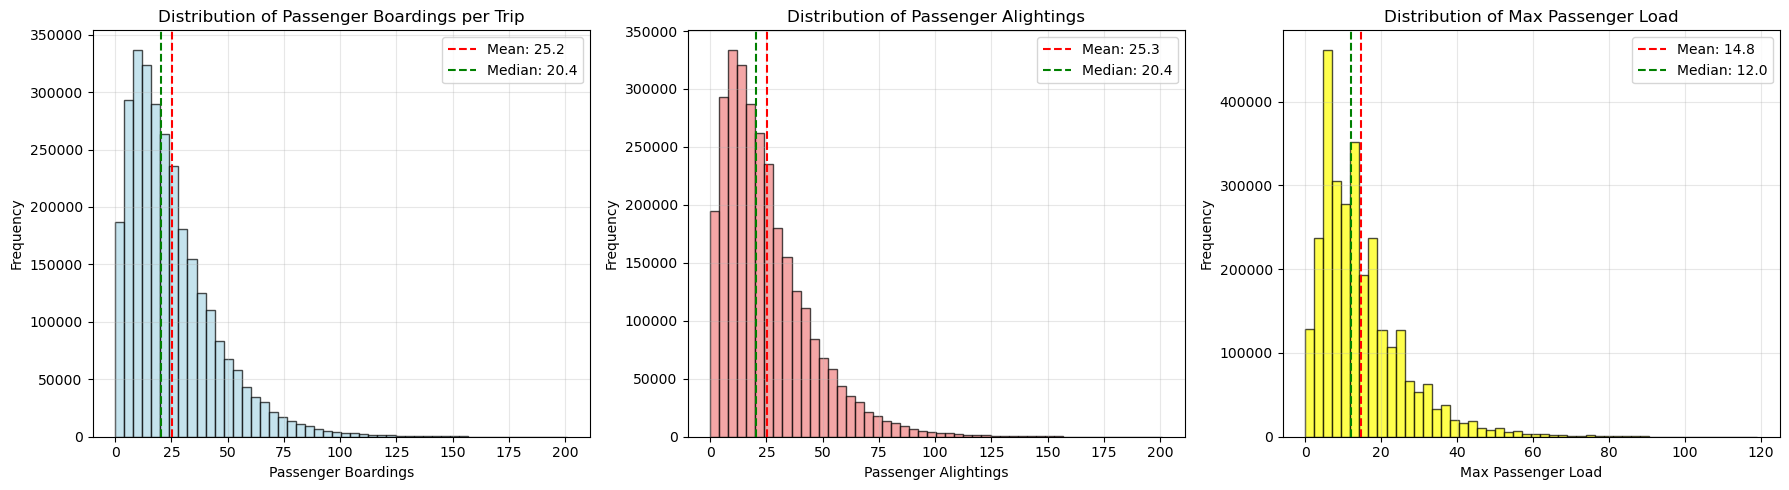

In [337]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# histogram for boardings
axes[0].hist(trip_clean['PSNGR_BOARDINGS'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Passenger Boardings')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Passenger Boardings per Trip')
axes[0].axvline(trip_clean['PSNGR_BOARDINGS'].mean(), color='red', linestyle='--', label=f"Mean: {trip_clean['PSNGR_BOARDINGS'].mean():.1f}")
axes[0].axvline(trip_clean['PSNGR_BOARDINGS'].median(), color='green', linestyle='--', label=f"Median: {trip_clean['PSNGR_BOARDINGS'].median():.1f}")
axes[0].legend()
axes[0].grid(alpha=0.3)

# histogram for alightings
axes[1].hist(trip_clean['PSNGR_ALIGHTINGS'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Passenger Alightings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Passenger Alightings')
axes[1].axvline(trip_clean['PSNGR_ALIGHTINGS'].mean(), color='red', linestyle='--', label=f"Mean: {trip_clean['PSNGR_ALIGHTINGS'].mean():.1f}")
axes[1].axvline(trip_clean['PSNGR_ALIGHTINGS'].median(), color='green', linestyle='--', label=f"Median: {trip_clean['PSNGR_ALIGHTINGS'].median():.1f}")
axes[1].legend()
axes[1].grid(alpha=0.3)

# Histogram for max load
axes[2].hist(trip_clean['MAX_PSNGR_LOAD'], bins=50, color='yellow', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Max Passenger Load')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Max Passenger Load')
axes[2].axvline(trip_clean['MAX_PSNGR_LOAD'].mean(), color='red', linestyle='--', label=f"Mean: {trip_clean['MAX_PSNGR_LOAD'].mean():.1f}")
axes[2].axvline(trip_clean['MAX_PSNGR_LOAD'].median(), color='green', linestyle='--', label=f"Median: {trip_clean['MAX_PSNGR_LOAD'].median():.1f}")
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Time Based Analysis

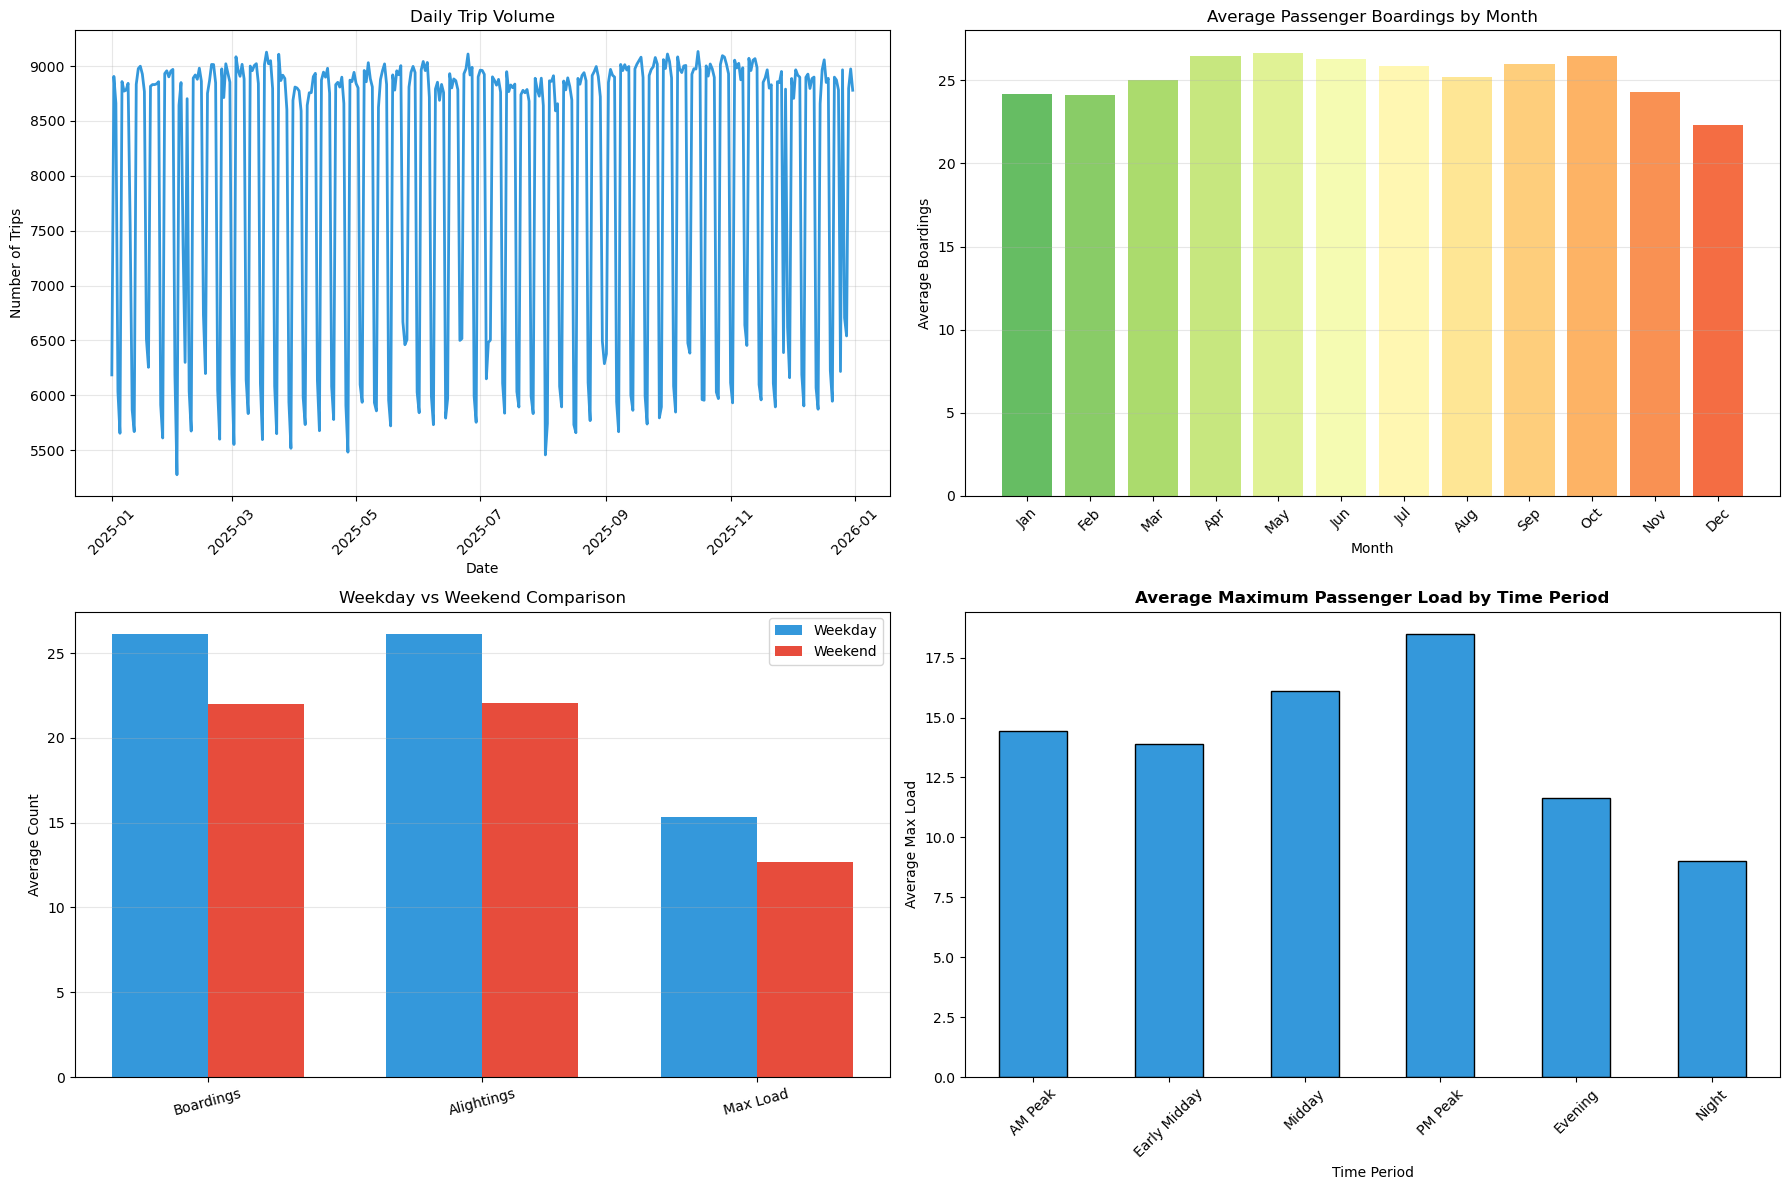

In [338]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# trips over time (daily)
daily_trips = trip_clean.groupby('OPERATION_DATE').size()
axes[0, 0].plot(daily_trips.index, daily_trips.values, color='#3498db', linewidth=2)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Trips')
axes[0, 0].set_title('Daily Trip Volume')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# average monthly boardings
monthly_boardings = trip_clean.groupby('month')['PSNGR_BOARDINGS'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].bar(range(len(monthly_boardings)), monthly_boardings.values, 
               color=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(monthly_boardings))))
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Boardings')
axes[0, 1].set_title('Average Passenger Boardings by Month')
axes[0, 1].set_xticks(range(len(monthly_boardings)))
axes[0, 1].set_xticklabels([month_names[i-1] for i in monthly_boardings.index], rotation=45)
axes[0, 1].grid(alpha=0.3, axis='y')

# weekday vs weekend comparison
weekend_comparison = trip_clean.groupby('is_weekend')[['PSNGR_BOARDINGS', 'PSNGR_ALIGHTINGS', 'MAX_PSNGR_LOAD']].mean()
x = np.arange(len(weekend_comparison.columns))
#width = 0.35
axes[1, 0].bar(x - width/2, weekend_comparison.iloc[0], width, label='Weekday', color='#3498db')
axes[1, 0].bar(x + width/2, weekend_comparison.iloc[1], width, label='Weekend', color='#e74c3c')
axes[1, 0].set_ylabel('Average Count')
axes[1, 0].set_title('Weekday vs Weekend Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Boardings', 'Alightings', 'Max Load'], rotation=15)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# average max load by time period
max_load_by_period = trip_clean.groupby('TIME_PERIOD')['MAX_PSNGR_LOAD'].mean()
# define proper order for time periods
time_order = ['AM Peak', 'Early Midday', 'Midday', 'PM Peak', 'Evening', 'Night']
max_load_by_period = max_load_by_period.reindex(time_order)
max_load_by_period.plot(kind='bar', ax=axes[1, 1], color='#3498db', edgecolor='black')
axes[1, 1].set_title('Average Maximum Passenger Load by Time Period', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].set_ylabel('Average Max Load')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Route analysis


Top 10 Routes Statistics:


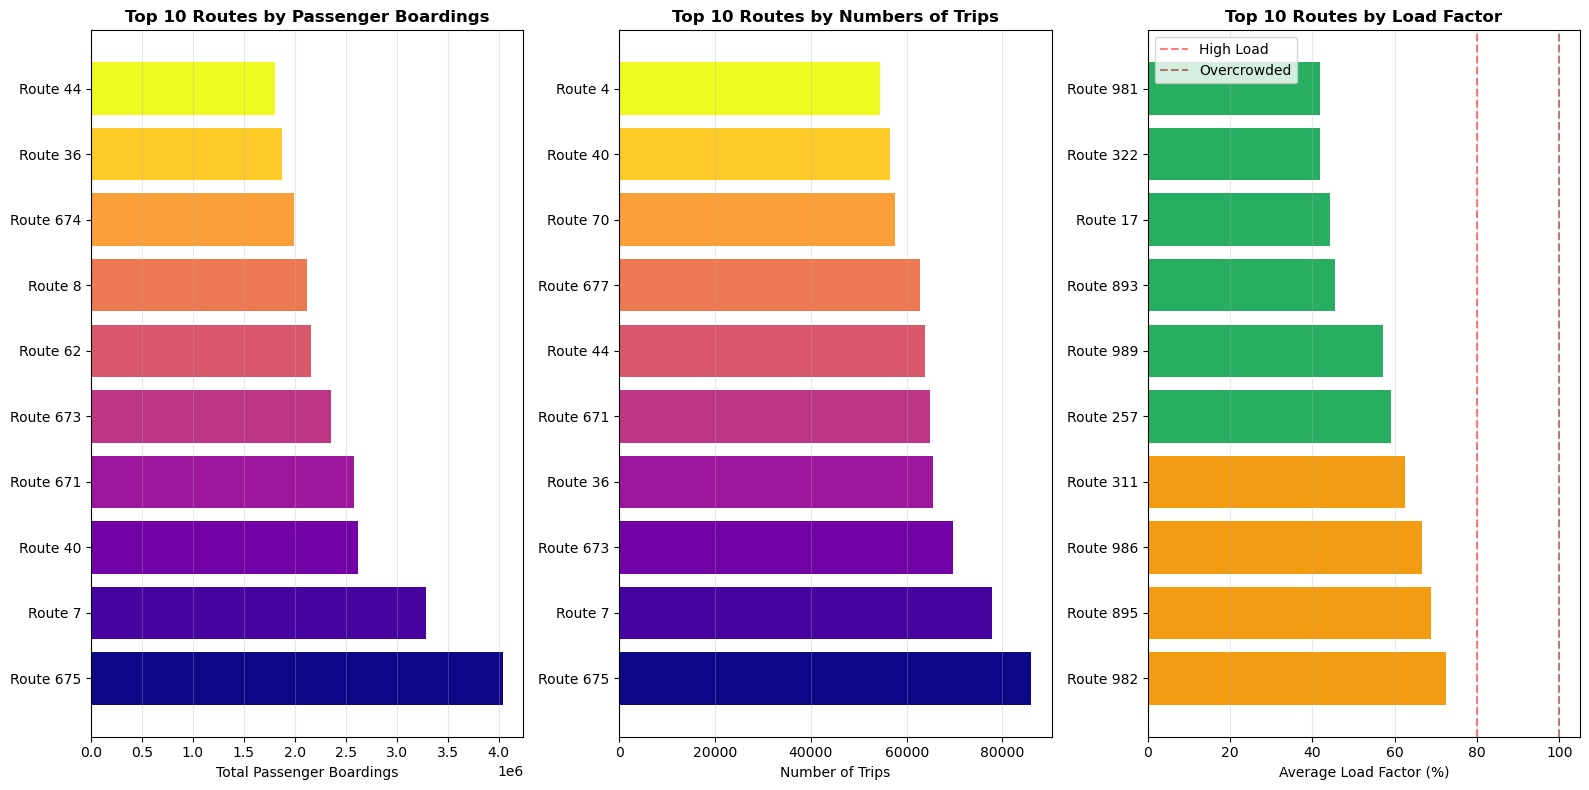

In [339]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# top 10 routes by total boardings
route_boardings = trip_clean.groupby('SERVICE_RTE_NUM')['PSNGR_BOARDINGS'].sum().sort_values(ascending=False).head(10)
axes[0].barh(range(len(route_boardings)), route_boardings.values, color=plt.cm.plasma(np.linspace(0, 1, len(route_boardings))))
axes[0].set_yticks(range(len(route_boardings)))
axes[0].set_yticklabels([f'Route {x}' for x in route_boardings.index])
axes[0].set_xlabel('Total Passenger Boardings')
axes[0].set_title('Top 10 Routes by Passenger Boardings', fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# top 10 routes by number of trips
num_trips = trip_clean.groupby('SERVICE_RTE_NUM').size().sort_values(ascending=False).head(10)
axes[1].barh(range(len(num_trips)), num_trips.values, color=plt.cm.plasma(np.linspace(0, 1, len(num_trips))))
axes[1].set_yticks(range(len(num_trips)))
axes[1].set_yticklabels([f'Route {x}' for x in num_trips.index])
axes[1].set_xlabel('Number of Trips')
axes[1].set_title('Top 10 Routes by Numbers of Trips', fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

# Top 10 routes by average load factor
route_load = trip_clean.groupby('SERVICE_RTE_NUM')['LOAD_FACTOR'].mean().sort_values(ascending=False).head(10)
colors = ['e74c3c' if x > 80 else '#f39c12' if x > 60 else '#27ae60' for x in route_load.values]
axes[2].barh(range(len(route_load)), route_load.values, color=colors)
axes[2].set_yticks(range(len(route_load)))
axes[2].set_yticklabels([f'Route {x}' for x in route_load.index])
axes[2].set_xlabel('Average Load Factor (%)')
axes[2].set_title('Top 10 Routes by Load Factor', fontweight='bold')
axes[2].axvline(x=80, color='red', linestyle='--', alpha=0.5, label='High Load')
axes[2].axvline(x=100, color='darkred', linestyle='--', alpha=0.5, label='Overcrowded')
axes[2].legend()
axes[2].grid(alpha=0.3, axis='x')

print("\nTop 10 Routes Statistics:")
plt.tight_layout()
plt.show()

## Categorical analysis

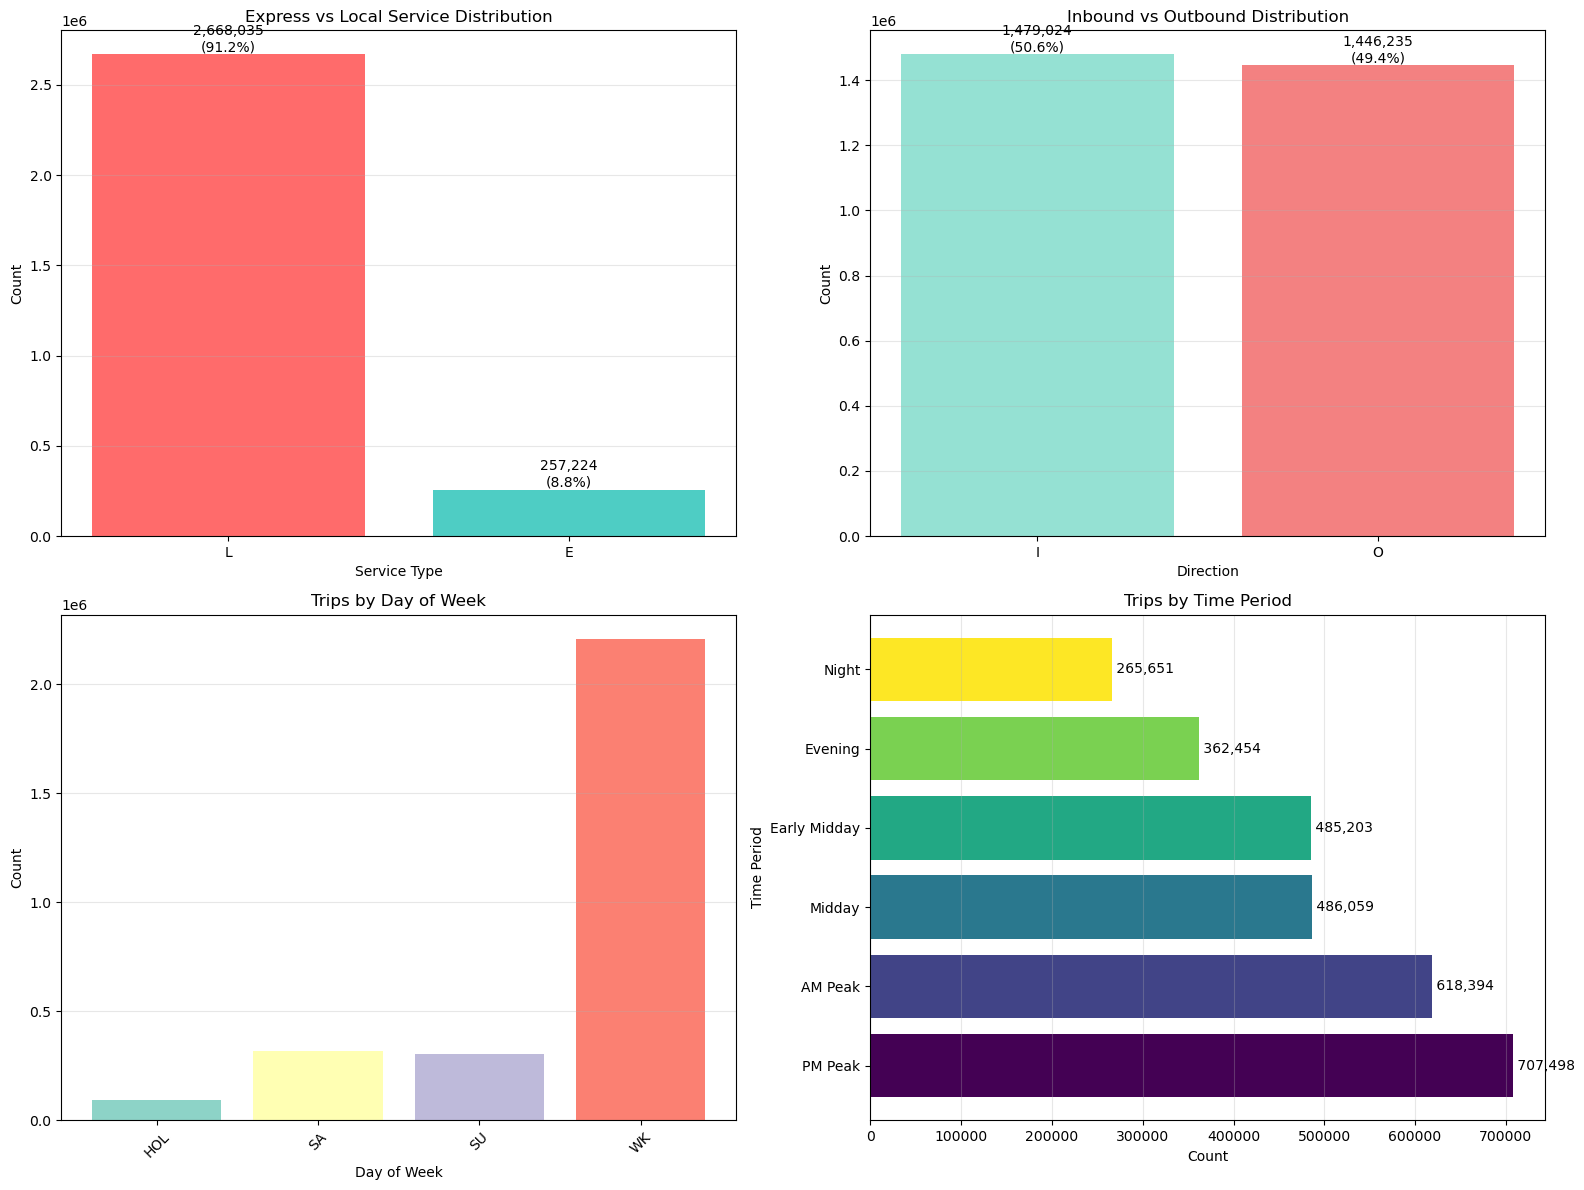

In [368]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Express vs Local
express_counts = trip_clean['EXPRESS_LOCAL_CD'].value_counts()
axes[0, 0].bar(express_counts.index, express_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_xlabel('Service Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Express vs Local Service Distribution')
for i, v in enumerate(express_counts.values):
    axes[0, 0].text(i, v, f'{v:,}\n({v/len(trip_clean)*100:.1f}%)', ha='center', va='bottom')
axes[0, 0].grid(alpha=0.3, axis='y')

# Inbound vs Outbound
direction_counts = trip_clean['INBD_OUTBD_CD'].value_counts()
axes[0, 1].bar(direction_counts.index, direction_counts.values, color=['#95E1D3', '#F38181'])
axes[0, 1].set_xlabel('Direction')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Inbound vs Outbound Distribution')
for i, v in enumerate(direction_counts.values):
    axes[0, 1].text(i, v, f'{v:,}\n({v/len(trip_clean)*100:.1f}%)', ha='center', va='bottom')
axes[0, 1].grid(alpha=0.3, axis='y')

# day of week
day_counts = trip_clean['DAY_CODE'].value_counts().sort_index()
colors = plt.cm.Set3(range(len(day_counts)))
axes[1, 0].bar(day_counts.index, day_counts.values, color=colors)
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Trips by Day of Week')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3, axis='y')

# time period
time_counts = trip_clean['TIME_PERIOD'].value_counts()
axes[1, 1].barh(time_counts.index, time_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(time_counts))))
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Time Period')
axes[1, 1].set_title('Trips by Time Period')
for i, v in enumerate(time_counts.values):
    axes[1, 1].text(v, i, f' {v:,}', va='center')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### Crowding analysis: Compare Max Load to Threshold

In [369]:
# Crowding indicator
trip_clean['is_crowded'] = (trip_clean['MAX_PSNGR_LOAD'] > trip_clean['CROWDING_THRESHOLD_NBR']).astype(int)
print("Created is_crowded flag")

# Categorize load levels
def categorize_load(load_factor):
    if load_factor < 50:
        return 'Low'
    elif load_factor < 80:
        return 'Medium'
    elif load_factor < 100:
        return 'High'
    else:
        return 'Overcrowded'

trip_clean['load_category'] = trip_clean['LOAD_FACTOR'].apply(categorize_load)
print("Created load_category feature")

Created is_crowded flag
Created load_category feature


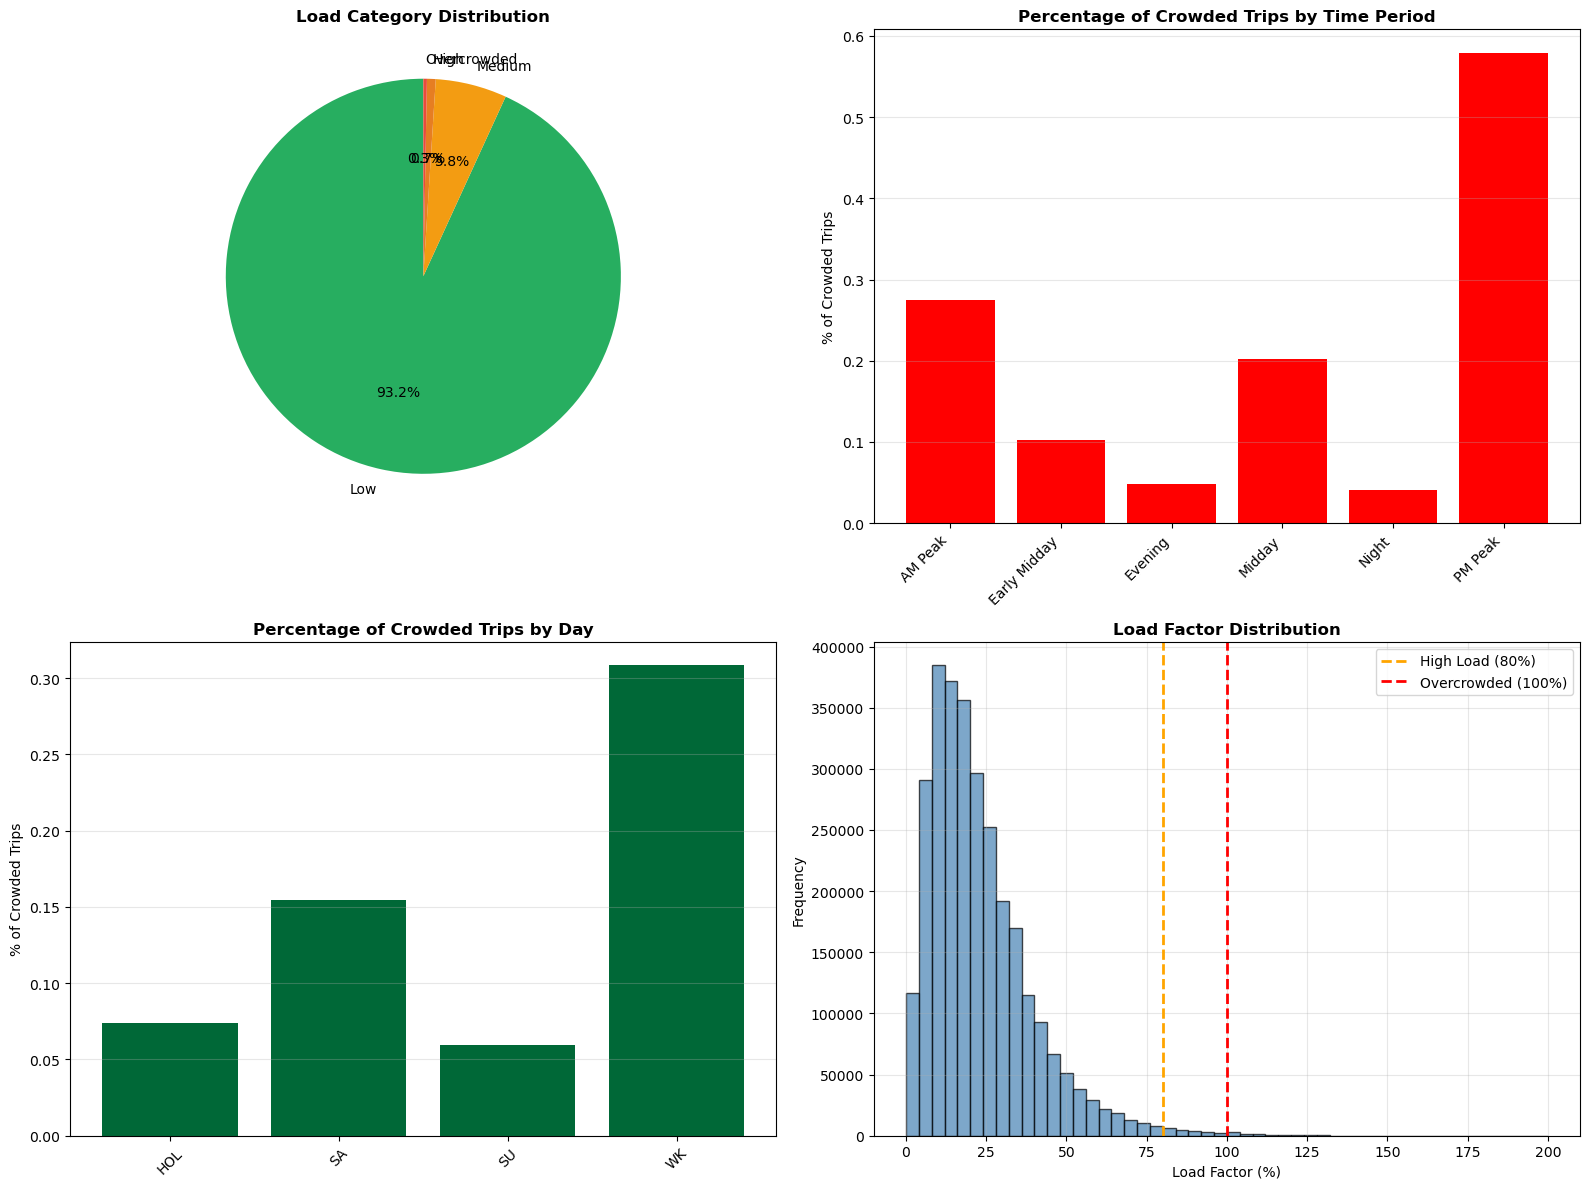

In [370]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Load category distribution
load_cat_counts = trip_clean['load_category'].value_counts()
colors_cat = {'Low': '#27ae60', 'Medium': '#f39c12', 'High': '#e67e22', 'Overcrowded': '#e74c3c'}
pie_colors = [colors_cat.get(cat, '#95a5a6') for cat in load_cat_counts.index]
axes[0, 0].pie(load_cat_counts.values, labels=load_cat_counts.index, autopct='%1.1f%%',
               colors=pie_colors, startangle=90)
axes[0, 0].set_title('Load Category Distribution', fontweight='bold')

# Crowding by time period
crowding_time = trip_clean.groupby('TIME_PERIOD')['is_crowded'].mean() * 100
axes[0, 1].bar(range(len(crowding_time)), crowding_time.values, 
               color="Red")
axes[0, 1].set_xticks(range(len(crowding_time)))
axes[0, 1].set_xticklabels(crowding_time.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('% of Crowded Trips')
axes[0, 1].set_title('Percentage of Crowded Trips by Time Period', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# Crowding by day
crowding_day = trip_clean.groupby('DAY_CODE')['is_crowded'].mean() * 100
axes[1, 0].bar(range(len(crowding_day)), crowding_day.values,
               color=plt.cm.RdYlGn_r(crowding_day.values/100))
axes[1, 0].set_xticks(range(len(crowding_day)))
axes[1, 0].set_xticklabels(crowding_day.index, rotation=45)
axes[1, 0].set_ylabel('% of Crowded Trips')
axes[1, 0].set_title('Percentage of Crowded Trips by Day', fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# Load factor distribution
axes[1, 1].hist(trip_clean['LOAD_FACTOR'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=80, color='orange', linestyle='--', linewidth=2, label='High Load (80%)')
axes[1, 1].axvline(x=100, color='red', linestyle='--', linewidth=2, label='Overcrowded (100%)')
axes[1, 1].set_xlabel('Load Factor (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Load Factor Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('crowding_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### Express Vs Local Comparision

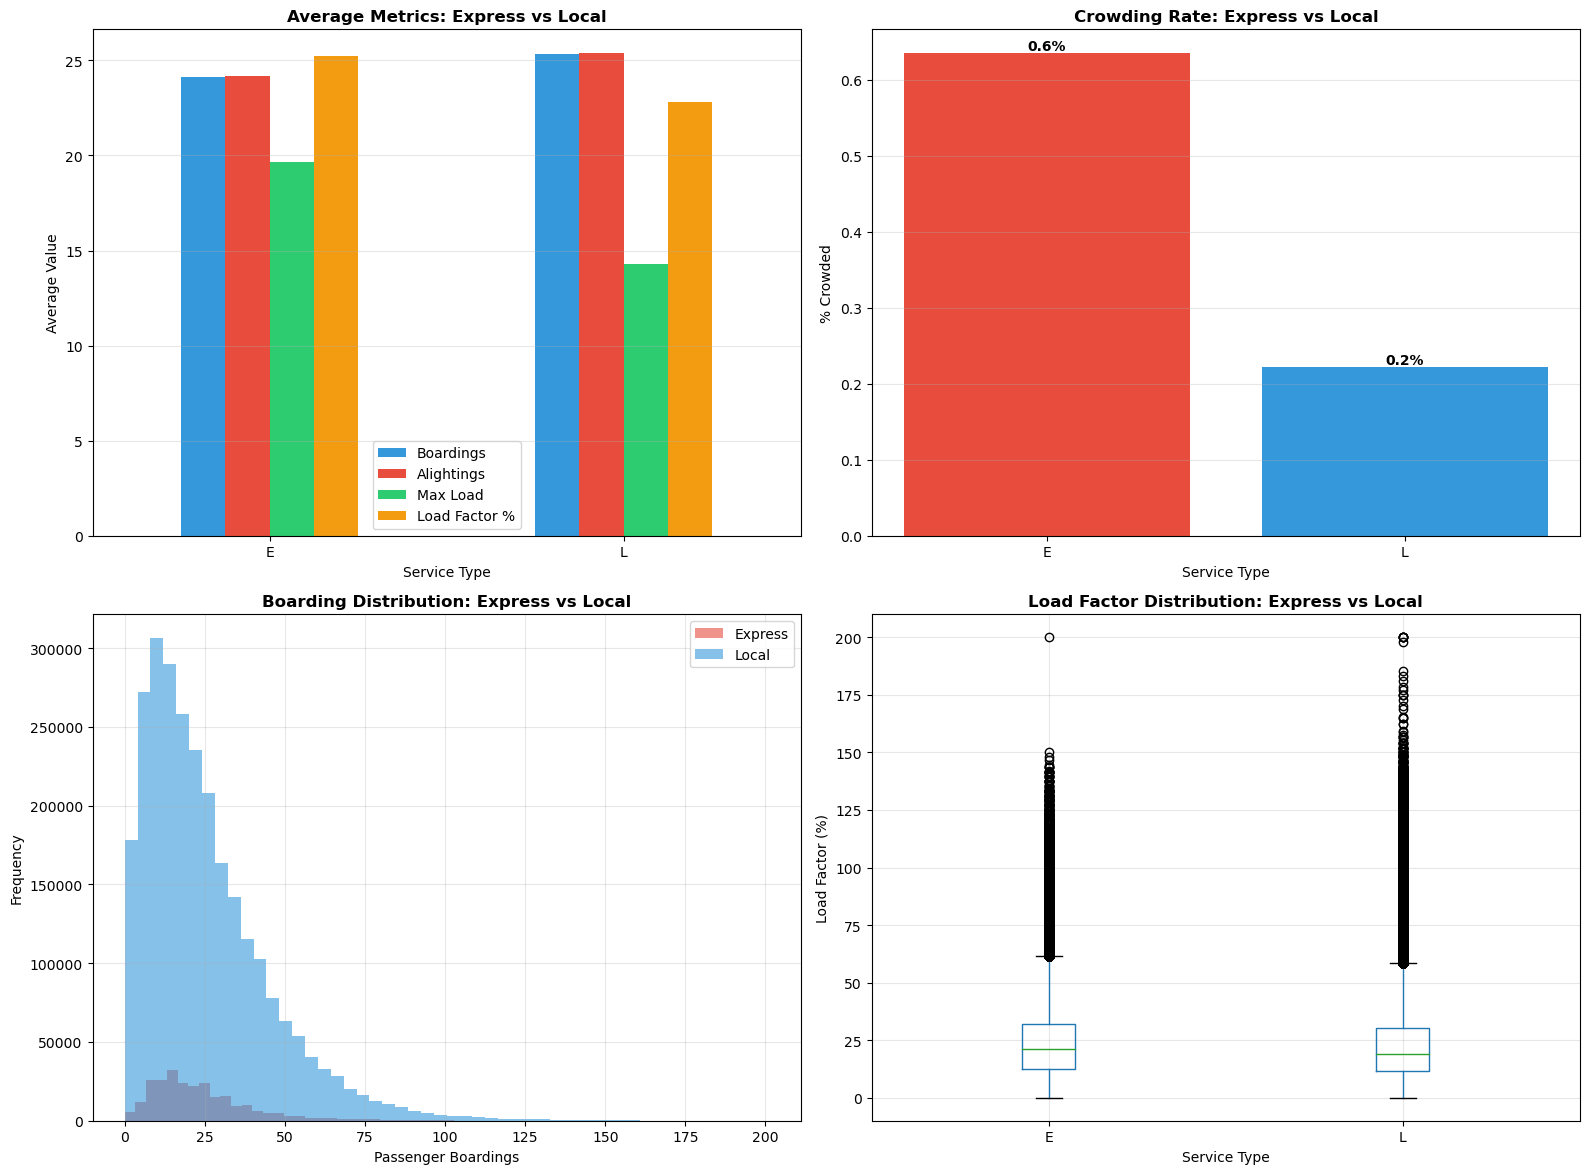

In [371]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average metrics comparison
express_local_stats = trip_clean.groupby('EXPRESS_LOCAL_CD')[['PSNGR_BOARDINGS', 'PSNGR_ALIGHTINGS', 'MAX_PSNGR_LOAD', 'LOAD_FACTOR']].mean()
express_local_stats.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0, 0].set_xlabel('Service Type')
axes[0, 0].set_ylabel('Average Value')
axes[0, 0].set_title('Average Metrics: Express vs Local', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].legend(['Boardings', 'Alightings', 'Max Load', 'Load Factor %'])
axes[0, 0].grid(alpha=0.3, axis='y')

# Crowding comparison
express_local_crowding = trip_clean.groupby('EXPRESS_LOCAL_CD')['is_crowded'].mean() * 100
axes[0, 1].bar(express_local_crowding.index, express_local_crowding.values, color=['#e74c3c', '#3498db'])
axes[0, 1].set_xlabel('Service Type')
axes[0, 1].set_ylabel('% Crowded')
axes[0, 1].set_title('Crowding Rate: Express vs Local', fontweight='bold')
for i, v in enumerate(express_local_crowding.values):
    axes[0, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# Distribution of boardings
trip_clean[trip_clean['EXPRESS_LOCAL_CD'] == 'E']['PSNGR_BOARDINGS'].hist(bins=50, alpha=0.6, label='Express', ax=axes[1, 0], color='#e74c3c')
trip_clean[trip_clean['EXPRESS_LOCAL_CD'] == 'L']['PSNGR_BOARDINGS'].hist(bins=50, alpha=0.6, label='Local', ax=axes[1, 0], color='#3498db')
axes[1, 0].set_xlabel('Passenger Boardings')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Boarding Distribution: Express vs Local', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Load factor comparison
trip_clean.boxplot(column='LOAD_FACTOR', by='EXPRESS_LOCAL_CD', ax=axes[1, 1])
axes[1, 1].set_xlabel('Service Type')
axes[1, 1].set_ylabel('Load Factor (%)')
axes[1, 1].set_title('Load Factor Distribution: Express vs Local', fontweight='bold')
axes[1, 1].get_figure().suptitle('')  # Remove auto-generated title
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('express_local_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Key Insights & Summary

In [375]:
# Overall statistics
print("\n1. OVERALL STATISTICS")
print("-" * 50)
print(f"Total trips analyzed: {len(trip_clean):,}")
print(f"Date range: {trip_clean['OPERATION_DATE'].min()} to {trip_clean['OPERATION_DATE'].max()}")
print(f"Total unique routes: {trip_clean['SERVICE_RTE_NUM'].nunique()}")
print(f"Average daily trips: {len(trip_clean) / trip_clean['OPERATION_DATE'].nunique():,.0f}")

# Passenger statistics
print("\n2. PASSENGER STATISTICS")
print("-" * 50)
print(f"Total passenger boardings: {trip_clean['PSNGR_BOARDINGS'].sum():,.0f}")
print(f"Total passenger alightings: {trip_clean['PSNGR_ALIGHTINGS'].sum():,.0f}")
print(f"Average boardings per trip: {trip_clean['PSNGR_BOARDINGS'].mean():.2f}")
print(f"Average alightings per trip: {trip_clean['PSNGR_ALIGHTINGS'].mean():.2f}")
print(f"Average max load per trip: {trip_clean['MAX_PSNGR_LOAD'].mean():.2f}")

# Crowding statistics
print("\n3. CROWDING ANALYSIS")
print("-" * 50)
print(f"Average load factor: {trip_clean['LOAD_FACTOR'].mean():.2f}%")
print(f"Percentage of crowded trips: {trip_clean['is_crowded'].mean() * 100:.2f}%")
print(f"\nLoad Category Distribution:")
for cat in ['Low', 'Medium', 'High', 'Overcrowded']:
    count = (trip_clean['load_category'] == cat).sum()
    pct = count / len(trip_clean) * 100
    print(f"  {cat}: {count:,} trips ({pct:.2f}%)")

# Service type comparison
print("\n4. EXPRESS VS LOCAL COMPARISON")
print("-" * 50)
for service_type in trip_clean['EXPRESS_LOCAL_CD'].unique():
    subset = trip_clean[trip_clean['EXPRESS_LOCAL_CD'] == service_type]
    service_name = 'Express' if service_type == 'E' else 'Local'
    print(f"\n{service_name} Service:")
    print(f"  Trips: {len(subset):,} ({len(subset)/len(trip_clean)*100:.1f}%)")
    print(f"  Avg boardings: {subset['PSNGR_BOARDINGS'].mean():.2f}")
    print(f"  Avg load factor: {subset['LOAD_FACTOR'].mean():.2f}%")
    print(f"  Crowding rate: {subset['is_crowded'].mean() * 100:.2f}%")

# Peak periods
print("\n5. PEAK PERIODS")
print("-" * 50)
peak_time = trip_clean.groupby('TIME_PERIOD')['PSNGR_BOARDINGS'].sum().idxmax()
peak_day = trip_clean.groupby('DAY_CODE')['PSNGR_BOARDINGS'].sum().idxmax()
print(f"Peak time period: {peak_time}")
print(f"Peak day: {peak_day}")

# Top routes
print("\n6. TOP ROUTES")
print("-" * 50)
print("\nTop 5 busiest routes (by total boardings):")
top_routes = trip_clean.groupby('SERVICE_RTE_NUM')['PSNGR_BOARDINGS'].sum().sort_values(ascending=False).head(5)
for i, (route, boardings) in enumerate(top_routes.items(), 1):
    print(f"  {i}. Route {route}: {boardings:,.0f} total boardings")



1. OVERALL STATISTICS
--------------------------------------------------
Total trips analyzed: 2,925,259
Date range: 2025-01-01 00:00:00 to 2025-12-31 00:00:00
Total unique routes: 127
Average daily trips: 8,014

2. PASSENGER STATISTICS
--------------------------------------------------
Total passenger boardings: 73,847,230
Total passenger alightings: 73,906,740
Average boardings per trip: 25.24
Average alightings per trip: 25.27
Average max load per trip: 14.77

3. CROWDING ANALYSIS
--------------------------------------------------
Average load factor: 23.01%
Percentage of crowded trips: 0.26%

Load Category Distribution:
  Low: 2,725,154 trips (93.16%)
  Medium: 170,748 trips (5.84%)
  High: 20,807 trips (0.71%)
  Overcrowded: 8,550 trips (0.29%)

4. EXPRESS VS LOCAL COMPARISON
--------------------------------------------------

Local Service:
  Trips: 2,668,035 (91.2%)
  Avg boardings: 25.35
  Avg load factor: 22.79%
  Crowding rate: 0.22%

Express Service:
  Trips: 257,224 (8.8%)